<a href="https://colab.research.google.com/github/Dejan-Cugalj/MASTER-TEZA/blob/main/MASTER_TEZA_PLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Predikcija ispravnog očitavanje senzora mase protoka vazduha motora automobila"**
## *MASTER TEZA*
---

#### Mentori:
#### ***Prof. dr. Marina Marjanović Jakovljević***
####***Prof. dr. Miodrag Živković***
### Student: **Dejan Čugalj (2019/430054)**


---
#1. Struktura skupa podataka (dataseta)
[Preuzimanje skupa podataka](https://github.com/Dejan-Cugalj/CANBUS_dataset/blob/main/golf-master-canbus_dataset.csv)
---

>### 1.1 - Učitavanje potrebnih **biblioteka**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Sistemske
import datetime, os, time
# Numerika
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from sklearn.preprocessing import StandardScaler
# Linearna Regresija
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#Evaluacija
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import statsmodels.api as sm
#Grafika
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
print("*********** Učitane Biblioteke... ********************\n")

*********** Učitane Biblioteke... ********************



>### 1.2 - Učitavanje skupa podataka (eng. *dataset*)

> **LEGENDA DATASETA:**

*   **RPM** - **R**EVOLUTIONS **P**ER **M**INUTE sensor
*   **MAP** - **M**ANIFOLD **A**BSOLUTE **P**RESSURE sensor
*   **FGP** - **F**UEL **G**AUGE **P**RESSURE sensor
*   **IAT** - **I**NTAKE **A**IR **T**EMPERATURE sensor
*   **ECT** - **E**NGINE **C**OOLANT **T**EMPERATURE sensor
*   **CEL** - **C**ALCULATED **E**NGINE **L**OAD
*   **ABP** - **A**BSOLUTE **B**AROMETRIC **P**RESSURE
*   **MAF** - **M**ASS **A**IR **F**LOW sensor 








In [3]:
url = '/content/drive/MyDrive/FAKULTET/MASTER STUDIJE/MASTER TEZA-RAD/MATERIJAL/AI/1-PLR/golf-master-canbus_dataset.csv' # Uneti putanju do preuzetog dataseta

In [4]:
dataset = pd.read_csv(url ,sep=',', usecols = ['RPM', 'MAP', 'FGP', 'MAF'])
dataset.columns=['RPM', 'MAP', 'FGP', 'MAF']

print("*********** Ucitan DATASET... ********************\n")

*********** Ucitan DATASET... ********************



>### 1.3 Preprocesuiranje podataka

In [5]:
print("*********** DATASET ********************\n")
print(dataset.head(10))

*********** DATASET ********************

      RPM  MAP    FGP    MAF
0  946.00   87  23580  11.42
1  947.00   87  23730  11.52
2  950.75   87  25820  11.87
3  945.50   87  24510  11.26
4  951.25   87  25050  11.38
5  950.00   87  26700  11.90
6  949.50   87  25870  10.98
7  949.00   87  26180  11.44
8  951.00   87  26810  11.05
9  949.25   87  25930  11.41


> #### 3.1 Kreiranje Pandas Data-Frejma

In [6]:
# Odbacivanje obeležija koje nisu u korelaciji
#dataset.drop(['IAT', 'ECT', 'CEL', 'ABP'], axis=1, inplace=True)
 
X = dataset.iloc[:, :-1].values # Alokacija Matrice Obeležija / Nezavisnih Promenjivih (eng. Independent variables)
y = dataset.iloc[:, -1].values # Alokacija Zavisne Promenjive (eng. Dependent variable) MAF sernzora automobila
print("**************************************************************")
print("**************** KREIRAN PANDAs DATA FREJM ******************")
print("**************************************************************\n")
print("*************************   X   ************************\n")
print(X)
print("\n\n\n*************************   y   ************************\n")
print(y)

**************************************************************
**************** KREIRAN PANDAs DATA FREJM ******************
**************************************************************

*************************   X   ************************

[[  946.      87.   23580.  ]
 [  947.      87.   23730.  ]
 [  950.75    87.   25820.  ]
 ...
 [  878.75    87.   24510.  ]
 [  879.25    87.   26730.  ]
 [  878.75    87.   23680.  ]]



*************************   y   ************************

[11.42 11.52 11.87 ...  9.41  9.5   9.57]


>### 1.4 Sticanje uvida u prirodu podataka

>#### 1.4.1 Dataset info

In [7]:
print("*******************************************")
print("**************** DATASET ******************")
print("*******************************************")
print(dataset.head(10))
print("\n*****************************************************")
print("*************** PRIKAZ INDEX POLJA ******************")
print("*****************************************************")
print(dataset.keys()) # Prikaz indexa
print("\n********************************************************************")
print("*********** Prikaz polja ukoliko postoje ""NaN"" vrednosti ************")
print("********************************************************************")
print(dataset.isnull().sum()) # Prikaz polja ukoliko postoije "NaN" vrednosti 
print("\n**********************************************************************")
print("**************** Prikaz oblika učitanog dataseta *********************")
print("**********************************************************************")
print(dataset.shape) # Prikaz oblika učitanog dataseta
print("\n****************************************************")
print("******************** Dataset Info ******************")
print("****************************************************")
print(dataset.info()) # Prikaz oblika učitanog dataseta

*******************************************
**************** DATASET ******************
*******************************************
      RPM  MAP    FGP    MAF
0  946.00   87  23580  11.42
1  947.00   87  23730  11.52
2  950.75   87  25820  11.87
3  945.50   87  24510  11.26
4  951.25   87  25050  11.38
5  950.00   87  26700  11.90
6  949.50   87  25870  10.98
7  949.00   87  26180  11.44
8  951.00   87  26810  11.05
9  949.25   87  25930  11.41

*****************************************************
*************** PRIKAZ INDEX POLJA ******************
*****************************************************
Index(['RPM', 'MAP', 'FGP', 'MAF'], dtype='object')

********************************************************************
*********** Prikaz polja ukoliko postoje NaN vrednosti ************
********************************************************************
RPM    0
MAP    0
FGP    0
MAF    0
dtype: int64

**********************************************************************
******

>#### 1.4.2 Prikaz korelacione matrice (numerički)

In [8]:
print("\n*******************************************************************")
print("***************** Numerička Korelaciona Matrica *******************")
print("*******************************************************************")
print(dataset.info()) # dataset info
corrMatrix = dataset.corr()
print (corrMatrix) # Numrerički prikaz korelacione matrice


*******************************************************************
***************** Numerička Korelaciona Matrica *******************
*******************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPM     2759 non-null   float64
 1   MAP     2759 non-null   int64  
 2   FGP     2759 non-null   int64  
 3   MAF     2759 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 86.3 KB
None
          RPM       MAP       FGP       MAF
RPM  1.000000  0.913430  0.957484  0.984641
MAP  0.913430  1.000000  0.922442  0.953109
FGP  0.957484  0.922442  1.000000  0.974711
MAF  0.984641  0.953109  0.974711  1.000000


>#### 1.4.3 Prikaz korelacione matrice (grafički)


*******************************************************************
***************** Grafička Korelaciona Matrica ********************
*******************************************************************


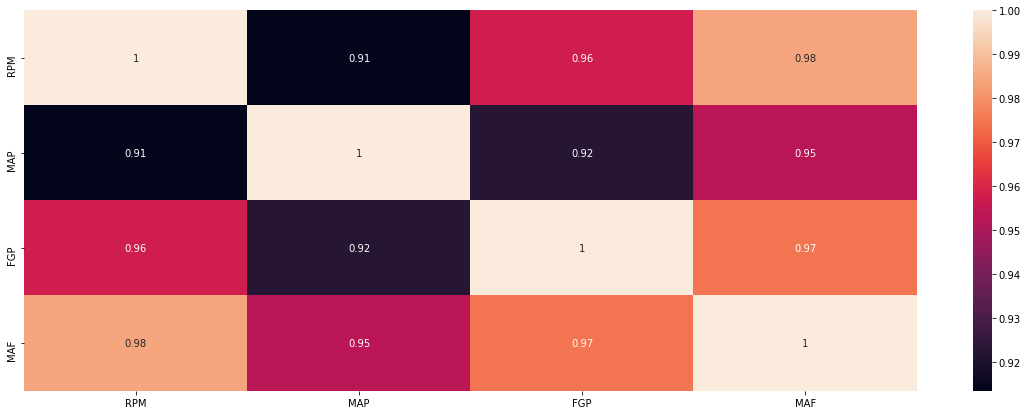

In [9]:
# Grafički prikaz korelacione matrice
print("\n*******************************************************************")
print("***************** Grafička Korelaciona Matrica ********************")
print("*******************************************************************")
 
plt.figure(figsize=(20,7))
sns.heatmap(corrMatrix, annot=True, square=False)

>#### 1.4.4 Prikaz uporednih analiza linearnost (grafički)

In [10]:
# Skaliranje Obeležija (eng. Feature Scaling)
sc = StandardScaler()
podaci = sc.fit_transform(dataset)
podaci_dataframe = pd.DataFrame(podaci) # Iz 'ndarray' u Pandas Data-Frame
podaci_dataframe.columns = ['RPM','MAP','FGP','MAF']

MAF_small = podaci_dataframe.MAF[30:350]

RPM_small = podaci_dataframe.RPM[30:350]
MAP_small = podaci_dataframe.MAP[30:350]
FGP_small = podaci_dataframe.FGP[30:350]
#podaci_dataframe.plot.hist(bins=50)
#podaci_dataframe.hist()

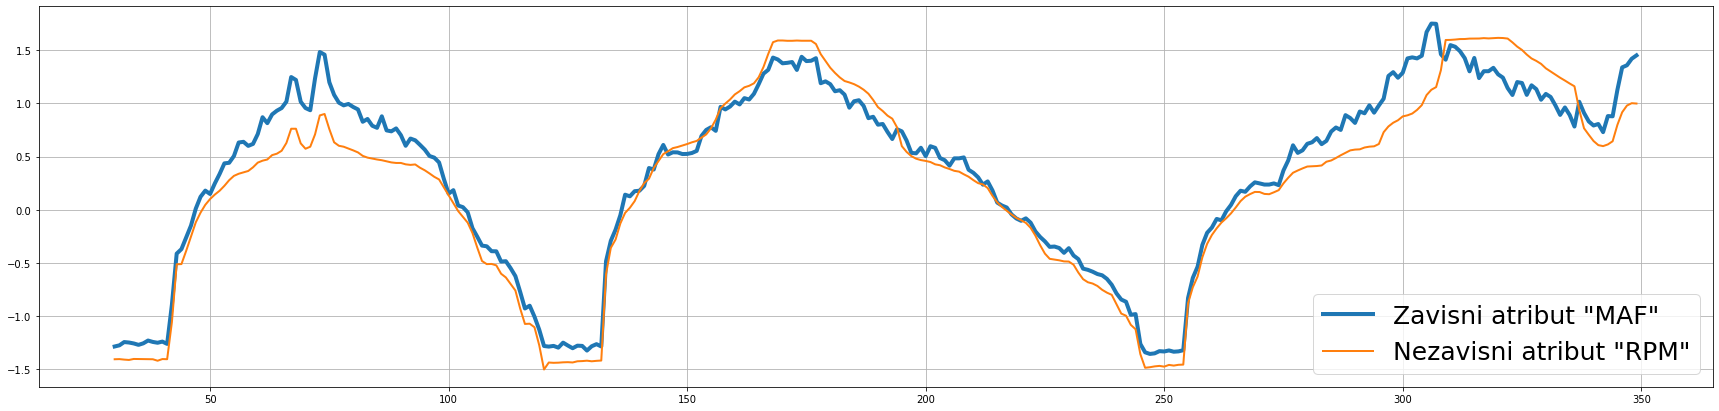

In [11]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(RPM_small, label='Nezavisni atribut "RPM"', linewidth=2) # 'Nezavisni atribut "RPM"
plt.grid()
plt.legend(loc="lower right", fontsize=25)
plt.xlabel('');

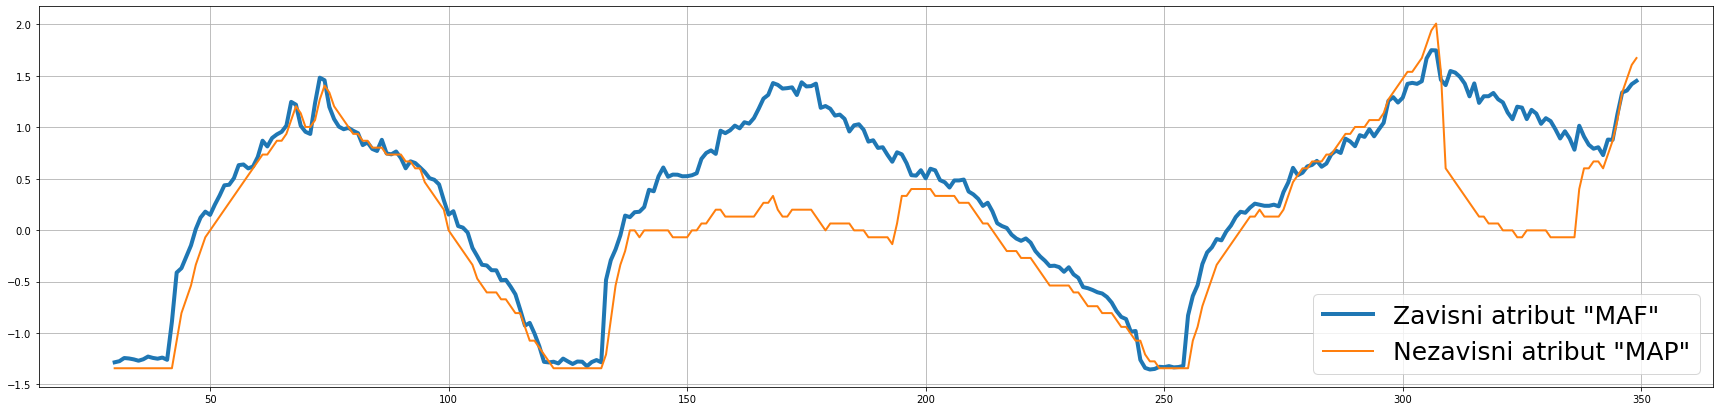

In [12]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(MAP_small, label='Nezavisni atribut "MAP"', linewidth=2) # 'Nezavisni atribut "MAP"
plt.grid()
plt.legend(loc="lower right", fontsize=25)
plt.xlabel('');

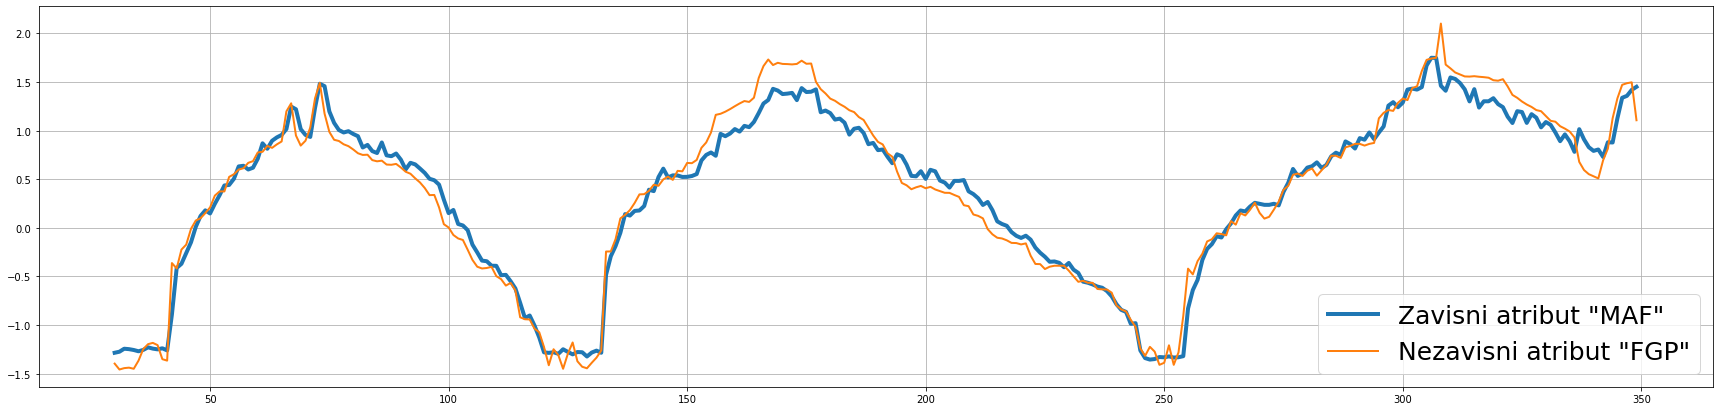

In [13]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(FGP_small, label='Nezavisni atribut "FGP"', linewidth=2) # 'Nezavisni atribut "FGP"
plt.grid()
plt.legend(loc="lower right", fontsize=25)
plt.xlabel('');

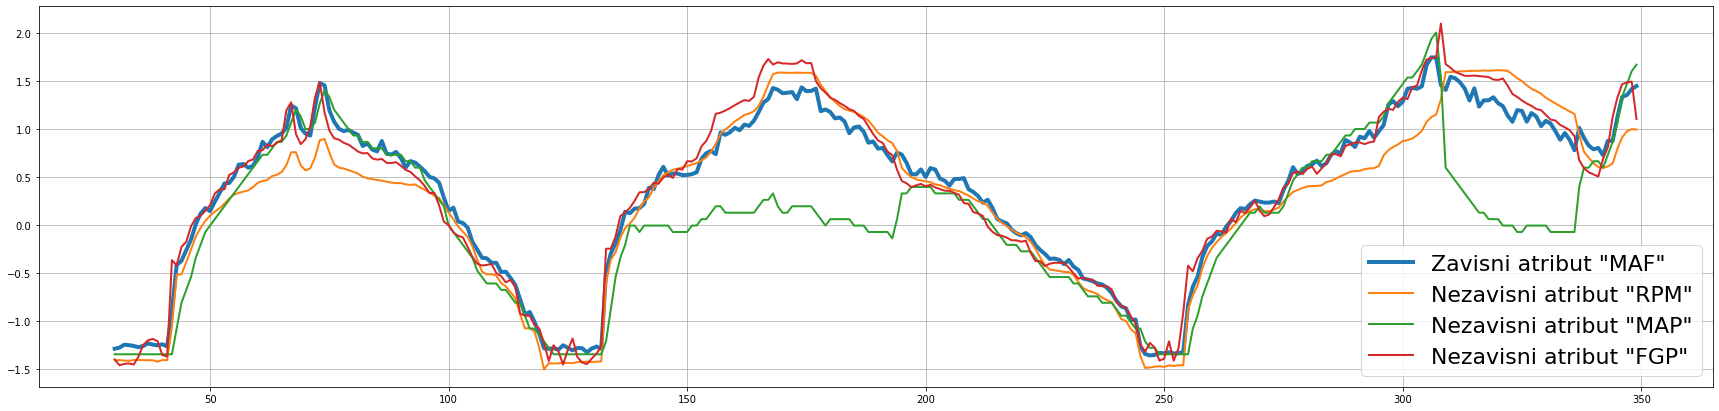

In [14]:
plt.figure(figsize=(30,7))
plt.plot(MAF_small, label='Zavisni atribut "MAF"', linewidth=4) # Zavisni atribut "MAF"
plt.plot(RPM_small, label='Nezavisni atribut "RPM"', linewidth=2) # 'Nezavisni atribut "RPM"
plt.plot(MAP_small, label='Nezavisni atribut "MAP"', linewidth=2) # 'Nezavisni atribut "MAP"
plt.plot(FGP_small, label='Nezavisni atribut "FGP"', linewidth=2) # 'Nezavisni atribut "FGP"
plt.grid()
plt.legend(loc="lower right", fontsize=22)
plt.xlabel('');

---
#2. Prosta Linearna Regresija (PLR)
---

>### 2.1 Sticanje uvida u prirodu podataka (PLR)


*********** DATASET keys()********************
Index(['RPM', 'MAF'], dtype='object')

*********** DATASET isnull()********************
RPM    0
MAF    0
dtype: int64

*********** DATASET shape()********************
(2759, 2)

*********** DATASET info()********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPM     2759 non-null   float64
 1   MAF     2759 non-null   float64
dtypes: float64(2)
memory usage: 43.2 KB
None
          RPM       MAF
RPM  1.000000  0.984641
MAF  0.984641  1.000000


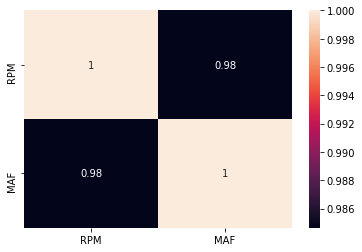

In [15]:
# Importovanje dataseta PLR
dataset_lr = pd.read_csv(url, usecols = ['RPM', 'MAF'])
dataset_lr.columns=['RPM','MAF']
print("\n*********** DATASET keys()********************")
print(dataset_lr.keys())
print("\n*********** DATASET isnull()********************")
print(dataset_lr.isnull().sum())
print("\n*********** DATASET shape()********************")
print(dataset_lr.shape)
print("\n*********** DATASET info()********************")
print(dataset_lr.info())
corrMatrix_lr = dataset_lr.corr()
print (corrMatrix_lr) # Numrerički prikaz korelacione matrice
sns.heatmap(corrMatrix_lr, annot=True)

>### 2.2 Implementacija Proste Linearne Regresije nad MAF i RPM atributima

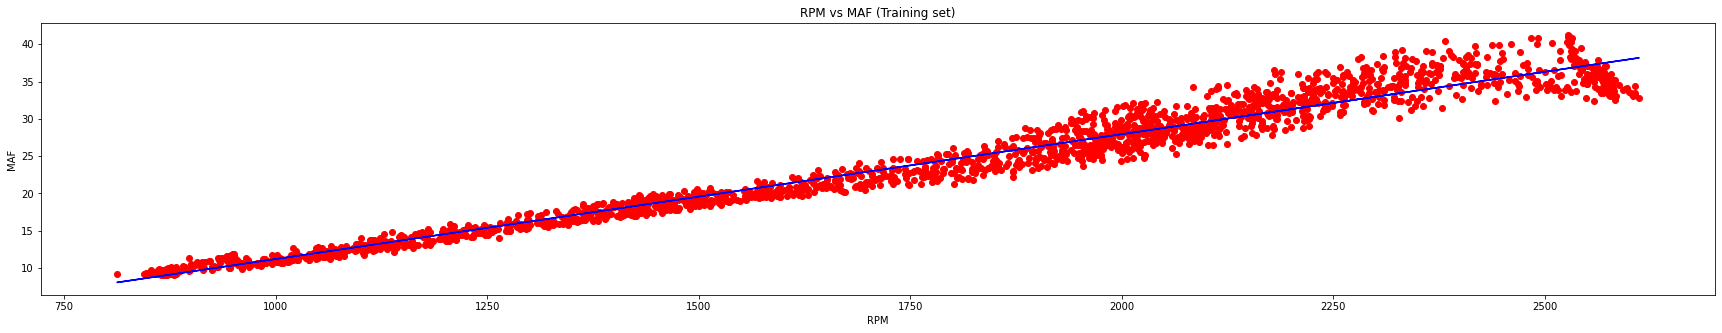

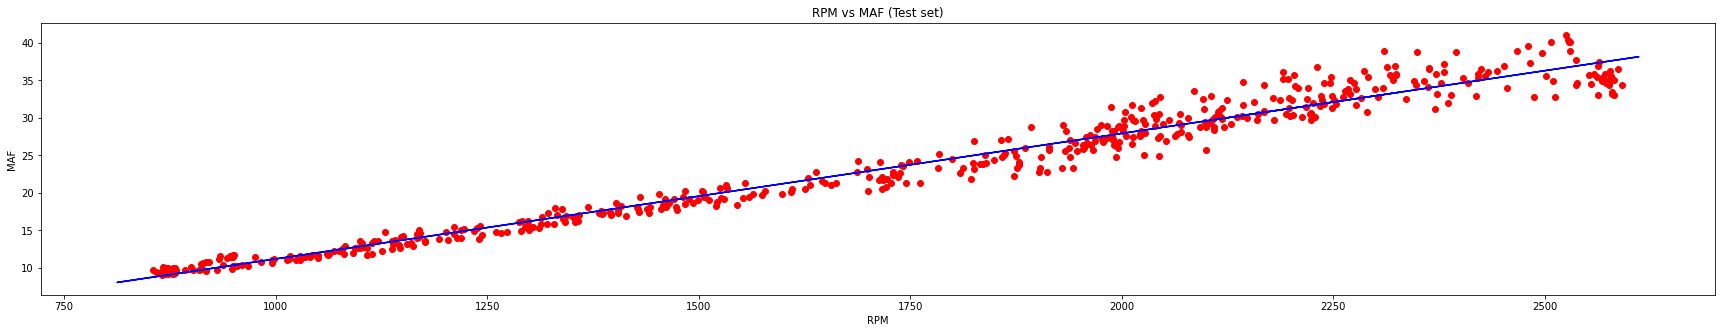

In [16]:
X_lr = dataset_lr.iloc[:, :-1].values
y_lr = dataset_lr.iloc[:, -1].values

# Razdvajanje na trerning i testni skup
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 0)

# Normalizacija obležija
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Linearna Regresija trerning nad testnim setom
regressor_lr = LinearRegression()
regressor_lr.fit(X_train_lr, y_train_lr)

# Predikcija Test set rezultata
y_pred_lr = regressor_lr.predict(X_test_lr)

# Vizualizacija rezultata nad trerning setom 
plt.figure(figsize=(30,5))
plt.scatter(X_train_lr, y_train_lr, color = 'red')
plt.plot(X_train_lr, regressor_lr.predict(X_train_lr), color = 'blue')
plt.title('RPM vs MAF (Training set)')
plt.xlabel('RPM')
plt.ylabel('MAF')
plt.show()

# Vizualizacija rezultata nad testnim setom
plt.figure(figsize=(30,5))
plt.scatter(X_test_lr, y_test_lr, color = 'red')
plt.plot(X_train_lr, regressor_lr.predict(X_train_lr), color = 'blue')
plt.title('RPM vs MAF (Test set)')
plt.xlabel('RPM')
plt.ylabel('MAF')
plt.show()


>### 2.3 Predikcija MAF senzora alatima Proste Linearne Regresije

In [17]:
# Evaluacija naučenog modela Linearne Regresije nad testnim skupom

est_lr_with_constant = sm.add_constant(y_pred_lr)

est_lr = sm.OLS(y_test_lr, est_lr_with_constant)
est2_lr  = est_lr.fit()
print(est2_lr.summary())

print('****************************************************************************************')
print('****************************************************************************************')

MSE = mean_squared_error(y_test_lr, y_pred_lr, squared=True)
RMSE = mean_squared_error(y_test_lr, y_pred_lr, squared=False)
MAE = mean_absolute_error(y_test_lr, y_pred_lr)
R2 = r2_score(y_test_lr, y_pred_lr)

print('Srednja kvadratna greška nad testnim skupom (MSE) = ', round(MSE, 2))
print('Koren srednje kvadratne greške nad testnim skupom (RMSE) =', round(RMSE, 2))
print("Srednja apsolutne greške (MAE) =", round(MAE, 2))
print("R-squared (R^2) =", round(R2, 3))
#evs_lr = explained_variance_score(y_test_lr, y_pred_lr) 


print('****************************************************************************************')
print('****************************************************************************************')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.811e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -1033.9
No. Observations:                 552   AIC:                             2072.
Df Residuals:                     550   BIC:                             2080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0412      0.183     -0.224      0.8

>### 2.4 Evaluacija naučenog modela Proste Linearne Regresije

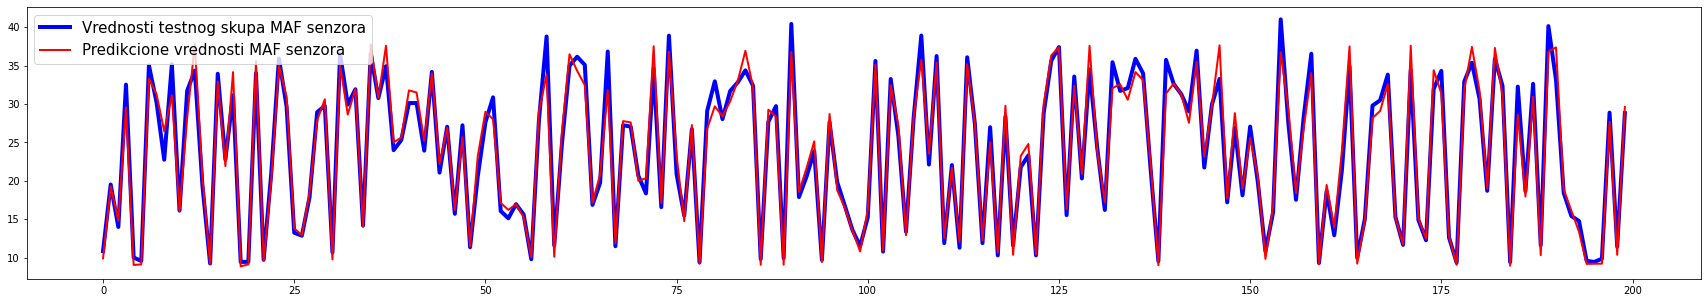

In [18]:
# Vizualizacija rezultata PLR nad testnim setom prediktovane i stvarne vrednosti MAF senzora
y_pred_lr_small = y_pred_lr[50:250]
y_test_lr_small = y_test_lr[50:250]


np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_lr_small.reshape(len(y_pred_lr_small),1), y_test_lr_small.reshape(len(y_test_lr_small),1)),1))

# Vizualizacija rezultata nad testnim setom 
plt.figure(figsize=(30,5))
plt.plot(y_test_lr_small, label='Vrednosti testnog skupa MAF senzora', linewidth=4, color = 'blue')
plt.plot(y_pred_lr_small, label='Predikcione vrednosti MAF senzora', linewidth=2, color = 'red')
#plt.title("Uporedna analiza testiranja predikcije Proste Linearne Regresije modela nad testnim setom", fontsize=20) 
plt.legend(loc="upper left", fontsize=15)
plt.show()


---
#3. Višestruka Linearna Regresija (VLR)
---

>### 3.1 Sticanje uvida u prirodu podataka (VLR)

In [19]:
# Importovanje dataseta VLR
dataset_mlr = pd.read_csv(url ,sep=',', usecols = ['RPM', 'MAP', 'FGP', 'MAF'])
dataset_mlr.columns=['RPM', 'MAP', 'FGP', 'MAF']
 
print("*********** DATASET ********************\n")
print(dataset_mlr.head(10))

print("\n*********** DATASET keys()********************")
print(dataset_mlr.keys())
print("\n*********** DATASET isnull()********************")
print(dataset_mlr.isnull().sum())
print("\n*********** DATASET shape()********************")
print(dataset_mlr.shape)
print("\n*********** DATASET info()********************")
print(dataset_mlr.info())

*********** DATASET ********************

      RPM  MAP    FGP    MAF
0  946.00   87  23580  11.42
1  947.00   87  23730  11.52
2  950.75   87  25820  11.87
3  945.50   87  24510  11.26
4  951.25   87  25050  11.38
5  950.00   87  26700  11.90
6  949.50   87  25870  10.98
7  949.00   87  26180  11.44
8  951.00   87  26810  11.05
9  949.25   87  25930  11.41

*********** DATASET keys()********************
Index(['RPM', 'MAP', 'FGP', 'MAF'], dtype='object')

*********** DATASET isnull()********************
RPM    0
MAP    0
FGP    0
MAF    0
dtype: int64

*********** DATASET shape()********************
(2759, 4)

*********** DATASET info()********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPM     2759 non-null   float64
 1   MAP     2759 non-null   int64  
 2   FGP     2759 non-null   int64  
 3   MAF     2759 non-null   float64
dtype

>### 3.2 ALOKACIJA MATRICE OBELEŽIJA (VLR)

In [20]:
X_mlr = dataset_mlr.iloc[:, :-1].values # Alokacija Matrice Obeležija / Nezavisnih Promenjivih (eng. Independent variables)
y_mlr = dataset_mlr.iloc[:, -1].values # Alokacija Zavisne Promenjive (eng. Dependent variable) MAF sernzora automobila
print("**************************************************************")
print("**************** KREIRAN PANDAs DATA FREJM ******************")
print("**************************************************************\n")
print("*************************   X   ************************")
print(X_mlr)
print("\n\n\n*************************   y   ************************")
print(y_mlr)

# Razdvajanje na trerning i testni skup
from sklearn.model_selection import train_test_split
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size = 0.2, random_state = 0)

print(X_train_mlr.shape)
print(X_test_mlr.shape)
print(y_train_mlr.shape)
print(y_test_mlr.shape)

**************************************************************
**************** KREIRAN PANDAs DATA FREJM ******************
**************************************************************

*************************   X   ************************
[[  946.      87.   23580.  ]
 [  947.      87.   23730.  ]
 [  950.75    87.   25820.  ]
 ...
 [  878.75    87.   24510.  ]
 [  879.25    87.   26730.  ]
 [  878.75    87.   23680.  ]]



*************************   y   ************************
[11.42 11.52 11.87 ...  9.41  9.5   9.57]
(2207, 3)
(552, 3)
(2207,)
(552,)


>### 3.3 Implementacija Višestruke Linearne Regresije nad RPM, MAP, FGP, MAF atributima

In [21]:
# Normalizacija obležija
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Linearna Regresija trerning nad testnim setom
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train_mlr, y_train_mlr)

# Predikcija Test set rezultata
y_pred_mlr = regressor_mlr.predict(X_test_mlr)

>### 3.4 Evaluacija naučenog modela Višestruke Linearne Regresije

In [22]:
# Evaluacija naučenog modela Linearne Regresije nad testnim skupom
est_mlr_with_constant = sm.add_constant(y_pred_mlr)

est_mlr = sm.OLS(y_test_mlr, est_mlr_with_constant)
est2_mlr  = est_mlr.fit()
print(est2_mlr.summary())

print('****************************************************************************************')
print('****************************************************************************************')

MSE_mlr = mean_squared_error(y_test_mlr, y_pred_mlr, squared=True)
RMSE_mlr = mean_squared_error(y_test_mlr, y_pred_mlr, squared=False)
MAE_mlr = mean_absolute_error(y_test_mlr, y_pred_mlr)
R2_mlr = r2_score(y_test_mlr, y_pred_mlr)

print('Srednja kvadratna greška nad testnim skupom (MSE) = ', round(MSE_mlr, 2))
print('Koren srednje kvadratne greške nad testnim skupom (RMSE) =', round(RMSE_mlr, 2))
print("Srednja apsolutne greške (MAE) =", round(MAE_mlr, 2))
print("R-squared (R^2) =", round(R2_mlr, 3))
#evs_lr = explained_variance_score(y_test_lr, y_pred_lr) 


print('****************************************************************************************')
print('****************************************************************************************')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.137e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -702.93
No. Observations:                 552   AIC:                             1410.
Df Residuals:                     550   BIC:                             1418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.100      0.015      0.9

****************************************


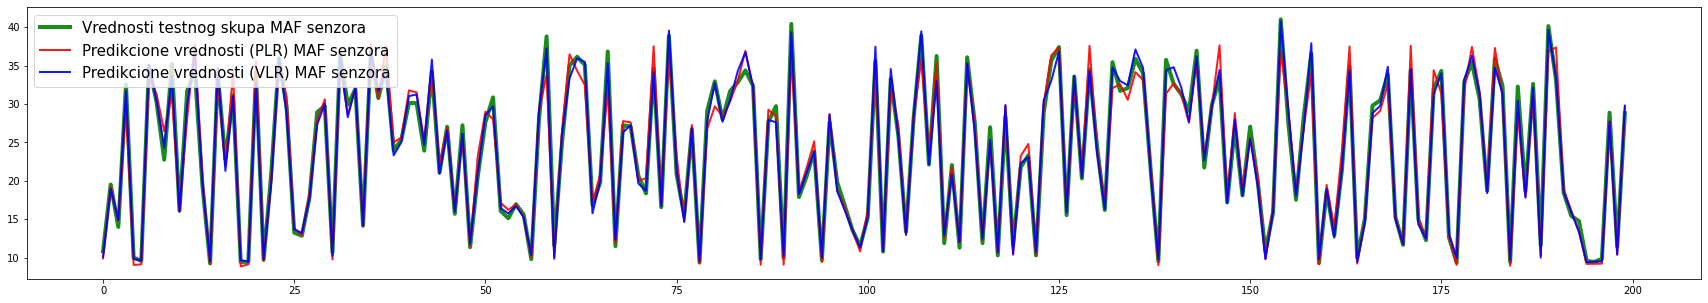

In [23]:
# Vizualizacija rezultata PLR nad testnim setom prediktovane i stvarne vrednosti MAF senzora
y_pred_mlr_small = y_pred_mlr[50:250]
y_test_mlr_small = y_test_mlr[50:250]
#print(X_train_lr[50:250])
print("****************************************")
#print(X_train_mlr[50:250])

np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_lr_small.reshape(len(y_pred_lr_small),1), y_test_lr_small.reshape(len(y_test_lr_small),1)),1))

# Vizualizacija rezultata nad testnim setom 
plt.figure(figsize=(30,5))
plt.plot(y_test_mlr_small, label='Vrednosti testnog skupa MAF senzora', linewidth=4, color = 'green', alpha=0.9)
plt.plot(y_pred_lr_small, label='Predikcione vrednosti (PLR) MAF senzora', linewidth=2, color = 'red', alpha=0.9)
plt.plot(y_pred_mlr_small, label='Predikcione vrednosti (VLR) MAF senzora', linewidth=2, color = 'blue', alpha=0.9)


#plt.title("Uporedna analiza testiranja predikcije Proste Linearne Regresije modela nad testnim setom", fontsize=20) 
plt.legend(loc="upper left", fontsize=15)
plt.show()

41.02


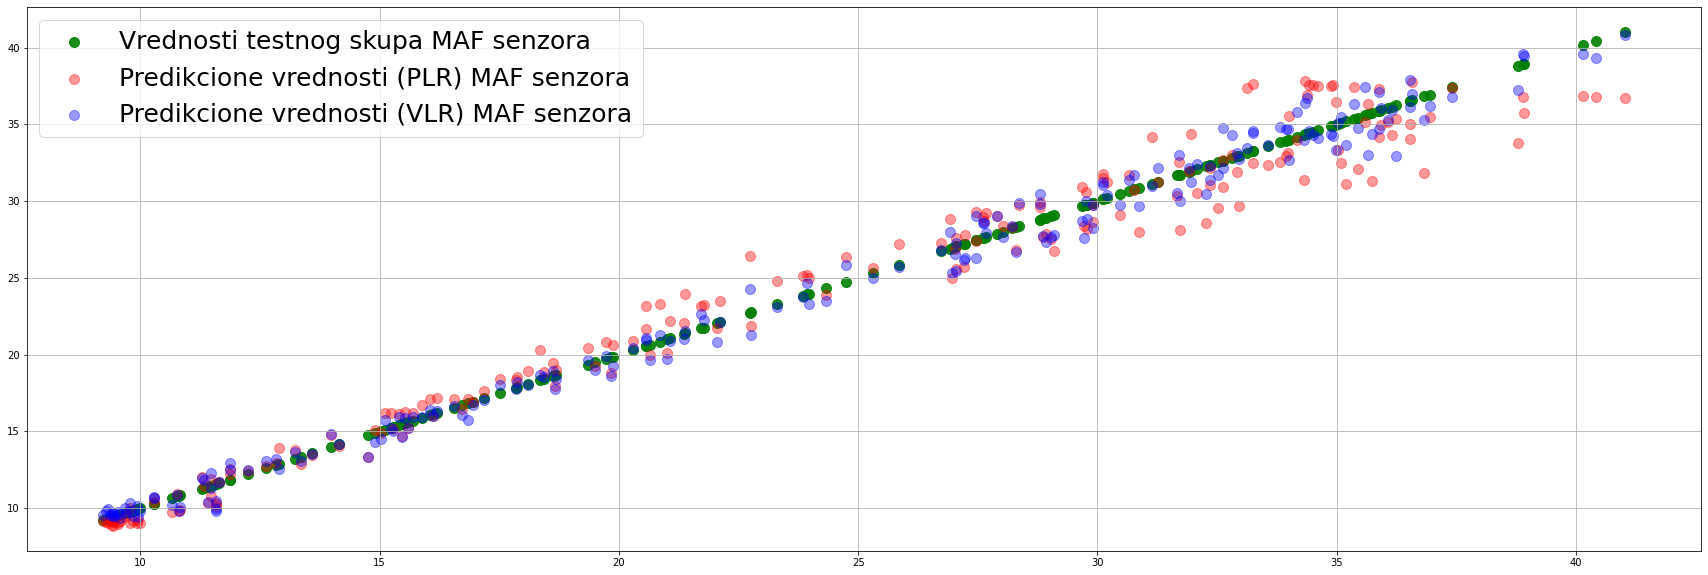

In [24]:
plt.figure(figsize=(30,10))
print(np.max(y_test_mlr_small))
plt.scatter(y_test_mlr_small, y_test_mlr_small, s=100, label='Vrednosti testnog skupa MAF senzora', alpha=0.9, color = 'green')
plt.scatter(y_test_mlr_small, y_pred_lr_small, s=100, label='Predikcione vrednosti (PLR) MAF senzora', alpha=0.4, color = 'red')
plt.scatter(y_test_mlr_small, y_pred_mlr_small, s=100, label='Predikcione vrednosti (VLR) MAF senzora', alpha=0.4, color = 'blue')
plt.grid()
plt.legend(loc="upper left", fontsize=25)


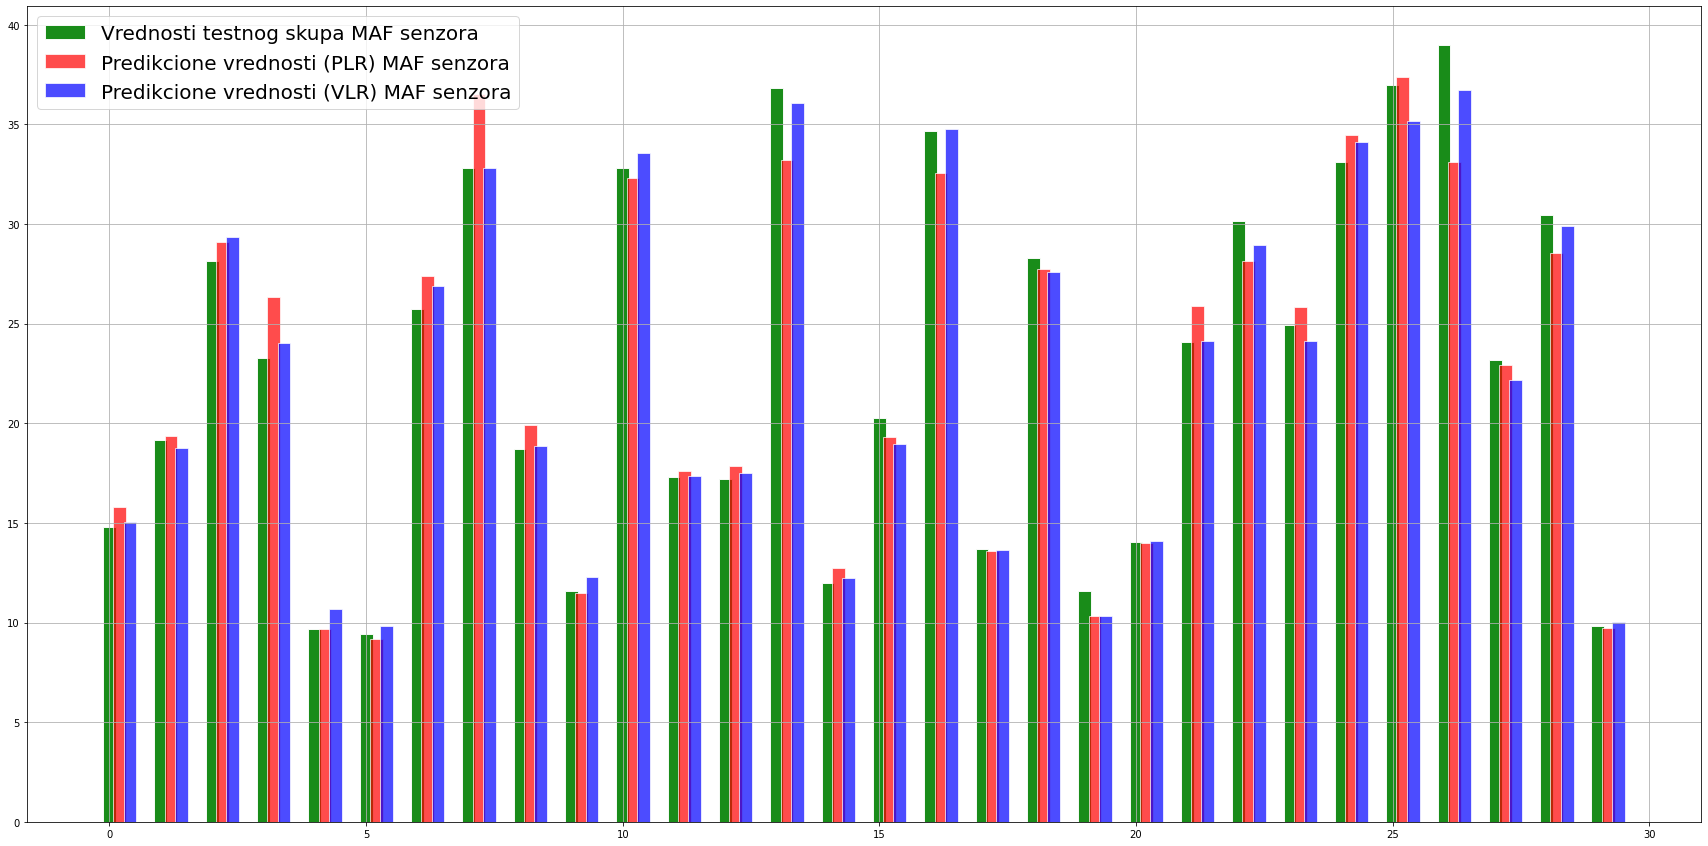

In [25]:
plt.figure(figsize=(30,15))
# set width of bars
barWidth = 0.2
barWidth1 = 9
y_test_mlr_small_bar = y_test_mlr[:30]
y_pred_lr_small_bar = y_pred_lr[:30]
y_pred_mlr_small_bar = y_pred_mlr[:30]


# Set position of bar on X axis
r1 = np.arange(len(y_test_mlr_small_bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, y_test_mlr_small_bar, color='green', width=0.25, edgecolor='white', label='Vrednosti testnog skupa MAF senzora', alpha=0.9)
plt.bar(r2, y_pred_lr_small_bar, color='red', width=0.25, edgecolor='white', label='Predikcione vrednosti (PLR) MAF senzora', alpha=0.7)
plt.bar(r3, y_pred_mlr_small_bar, color='blue', width=0.25, edgecolor='white', label='Predikcione vrednosti (VLR) MAF senzora', alpha=0.7)
plt.grid()
plt.legend(loc="upper left", fontsize=20)

---
#4. Random Forest ansambli (RF)
---

>### 4.1 Sticanje uvida u prirodu podataka (RF)

In [26]:
# Importovanje dataseta RF
dataset_rf = pd.read_csv(url ,sep=',', usecols = ['RPM', 'MAP', 'FGP', 'MAF'])
dataset_rf.columns=['RPM', 'MAP', 'FGP', 'MAF']
 
print("*********** DATASET ********************\n")
print(dataset_rf.head(10))

print("\n*********** DATASET keys()********************")
print(dataset_rf.keys())
print("\n*********** DATASET isnull()********************")
print(dataset_rf.isnull().sum())
print("\n*********** DATASET shape()********************")
print(dataset_rf.shape)
print("\n*********** DATASET info()********************")
print(dataset_rf.info())
print("\n*********** DATASET detaljan opis********************")
print(dataset_rf.describe())

*********** DATASET ********************

      RPM  MAP    FGP    MAF
0  946.00   87  23580  11.42
1  947.00   87  23730  11.52
2  950.75   87  25820  11.87
3  945.50   87  24510  11.26
4  951.25   87  25050  11.38
5  950.00   87  26700  11.90
6  949.50   87  25870  10.98
7  949.00   87  26180  11.44
8  951.00   87  26810  11.05
9  949.25   87  25930  11.41

*********** DATASET keys()********************
Index(['RPM', 'MAP', 'FGP', 'MAF'], dtype='object')

*********** DATASET isnull()********************
RPM    0
MAP    0
FGP    0
MAF    0
dtype: int64

*********** DATASET shape()********************
(2759, 4)

*********** DATASET info()********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPM     2759 non-null   float64
 1   MAP     2759 non-null   int64  
 2   FGP     2759 non-null   int64  
 3   MAF     2759 non-null   float64
dtype

>### 4.2 ALOKACIJA MATRICE OBELEŽIJA (RF)

In [27]:
X_rf = dataset_rf.iloc[:, :-1].values # Alokacija Matrice Obeležija / Nezavisnih Promenjivih (eng. Independent variables)
y_rf = dataset_rf.iloc[:, -1].values # Alokacija Zavisne Promenjive (eng. Dependent variable) MAF sernzora automobila
print("**************************************************************")
print("**************** KREIRAN PANDAs DATA FREJM ******************")
print("**************************************************************\n")
print("*************************   X   ************************")
print(X_rf)
print("\n\n\n*************************   y   ************************")
print(y_rf)

# Razdvajanje na trerning i testni skup
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 0)

print(X_train_rf.shape)
print(X_test_rf.shape)
print(y_train_rf.shape)
print(y_test_rf.shape)

**************************************************************
**************** KREIRAN PANDAs DATA FREJM ******************
**************************************************************

*************************   X   ************************
[[  946.      87.   23580.  ]
 [  947.      87.   23730.  ]
 [  950.75    87.   25820.  ]
 ...
 [  878.75    87.   24510.  ]
 [  879.25    87.   26730.  ]
 [  878.75    87.   23680.  ]]



*************************   y   ************************
[11.42 11.52 11.87 ...  9.41  9.5   9.57]
(2207, 3)
(552, 3)
(2207,)
(552,)


>### 4.3 Implementacija Random Forest ansambla nad RPM, MAP, FGP, MAF atributima

In [28]:
# Random Forest trerning nad testnim setom
regressor_rf = RandomForestRegressor(n_estimators=100, random_state = 0, oob_score= True)
regressor_rf.fit(X_train_rf, y_train_rf)

y_pred_rf = regressor_rf.predict(X_test_rf)

>### 3.4 Evaluacija naučenog modela Random Forest ansambla 

In [29]:
# Evaluacija naučenog modela Linearne Regresije nad testnim skupom
est_rf_with_constant = sm.add_constant(y_pred_rf)

est_rf = sm.OLS(y_test_rf, est_rf_with_constant)
est2_rf  = est_rf.fit()
print(est2_rf.summary())

print('****************************************************************************************')
print('****************************************************************************************')

MSE_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=True)
RMSE_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)
MAE_rf = mean_absolute_error(y_test_rf, y_pred_rf)
R2_rf = r2_score(y_test_rf, y_pred_rf)

print('Srednja kvadratna greška nad testnim skupom (MSE) = ', round(MSE_rf, 2))
print('Koren srednje kvadratne greške nad testnim skupom (RMSE) =', round(RMSE_rf, 2))
print("Srednja apsolutne greške (MAE) =", round(MAE_rf, 2))
print("R-squared (R^2) =", round(R2_rf, 3))
#evs_lr = explained_variance_score(y_test_lr, y_pred_lr) 


print('****************************************************************************************')
print('****************************************************************************************')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.607e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        11:53:08   Log-Likelihood:                -610.29
No. Observations:                 552   AIC:                             1225.
Df Residuals:                     550   BIC:                             1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0325      0.084     -0.386      0.7

****************************************


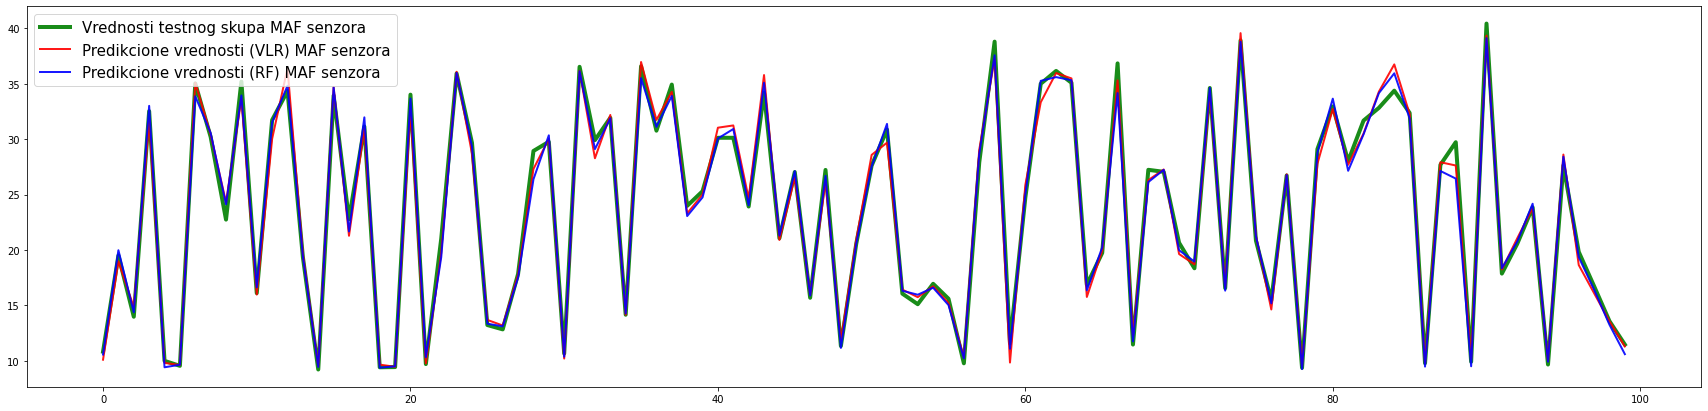

In [31]:
# Vizualizacija rezultata PLR nad testnim setom prediktovane i stvarne vrednosti MAF senzora
y_pred_rf_small = y_pred_rf[50:150]
y_test_rf_small = y_test_rf[50:150]
y_pred_mlr_small_rf = y_pred_mlr[50:150]
#print(X_train_lr[50:250])
print("****************************************")
#print(X_train_mlr[50:250])

np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_lr_small.reshape(len(y_pred_lr_small),1), y_test_lr_small.reshape(len(y_test_lr_small),1)),1))

# Vizualizacija rezultata nad testnim setom 
plt.figure(figsize=(30,7))
plt.plot(y_test_rf_small, label='Vrednosti testnog skupa MAF senzora', linewidth=4, color = 'green', alpha=0.9)
plt.plot(y_pred_mlr_small_rf, label='Predikcione vrednosti (VLR) MAF senzora', linewidth=2, color = 'red', alpha=0.9)
plt.plot(y_pred_rf_small, label='Predikcione vrednosti (RF) MAF senzora', linewidth=2, color = 'blue', alpha=0.9)


#plt.title("Uporedna analiza testiranja predikcije Proste Linearne Regresije modela nad testnim setom", fontsize=20) 
plt.legend(loc="upper left", fontsize=15)
plt.show()

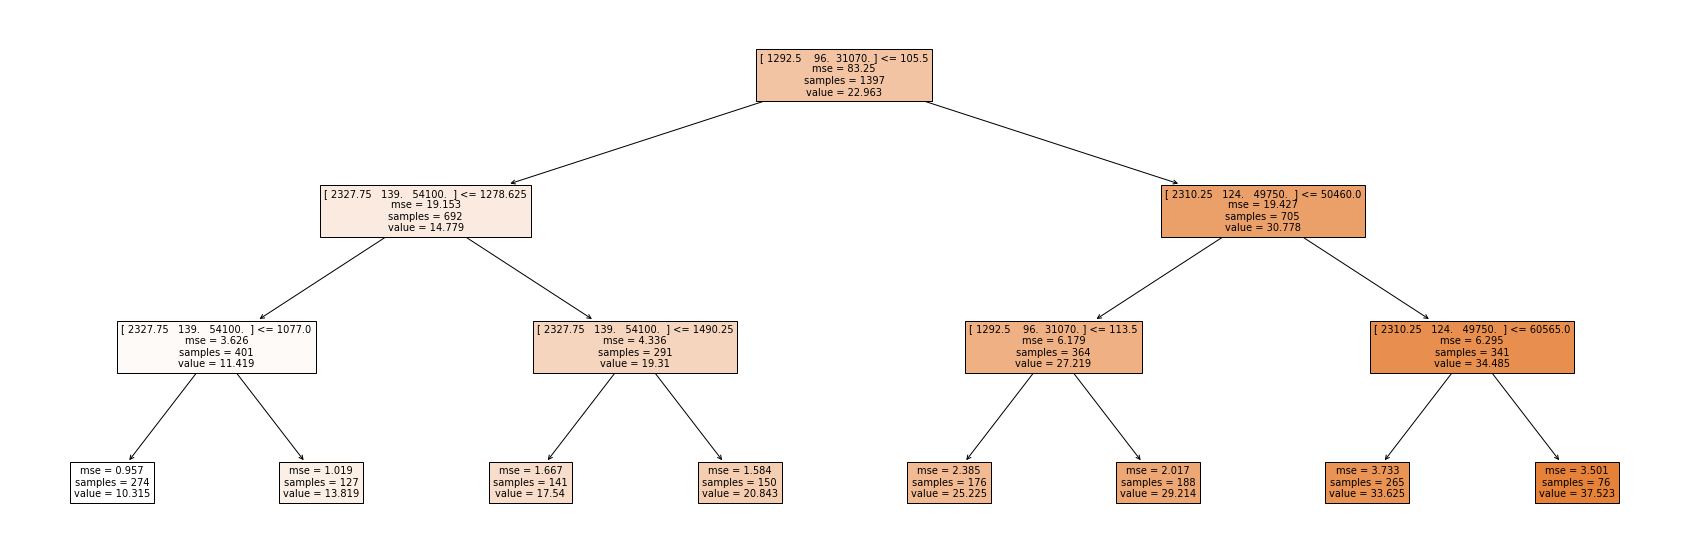

In [46]:
# Random Forest stabla odlučivanja
from sklearn import tree
regressor_rf = RandomForestRegressor(n_estimators=100, random_state = 0, oob_score= True, max_depth=3)
regressor_rf.fit(X_train_rf, y_train_rf)
plt.figure(figsize=(30,10))
_ = tree.plot_tree(regressor_rf.estimators_[0], feature_names=X_train_rf, filled=True)

---
#5. Uporedni rezultati PLR - VLR - RF
---

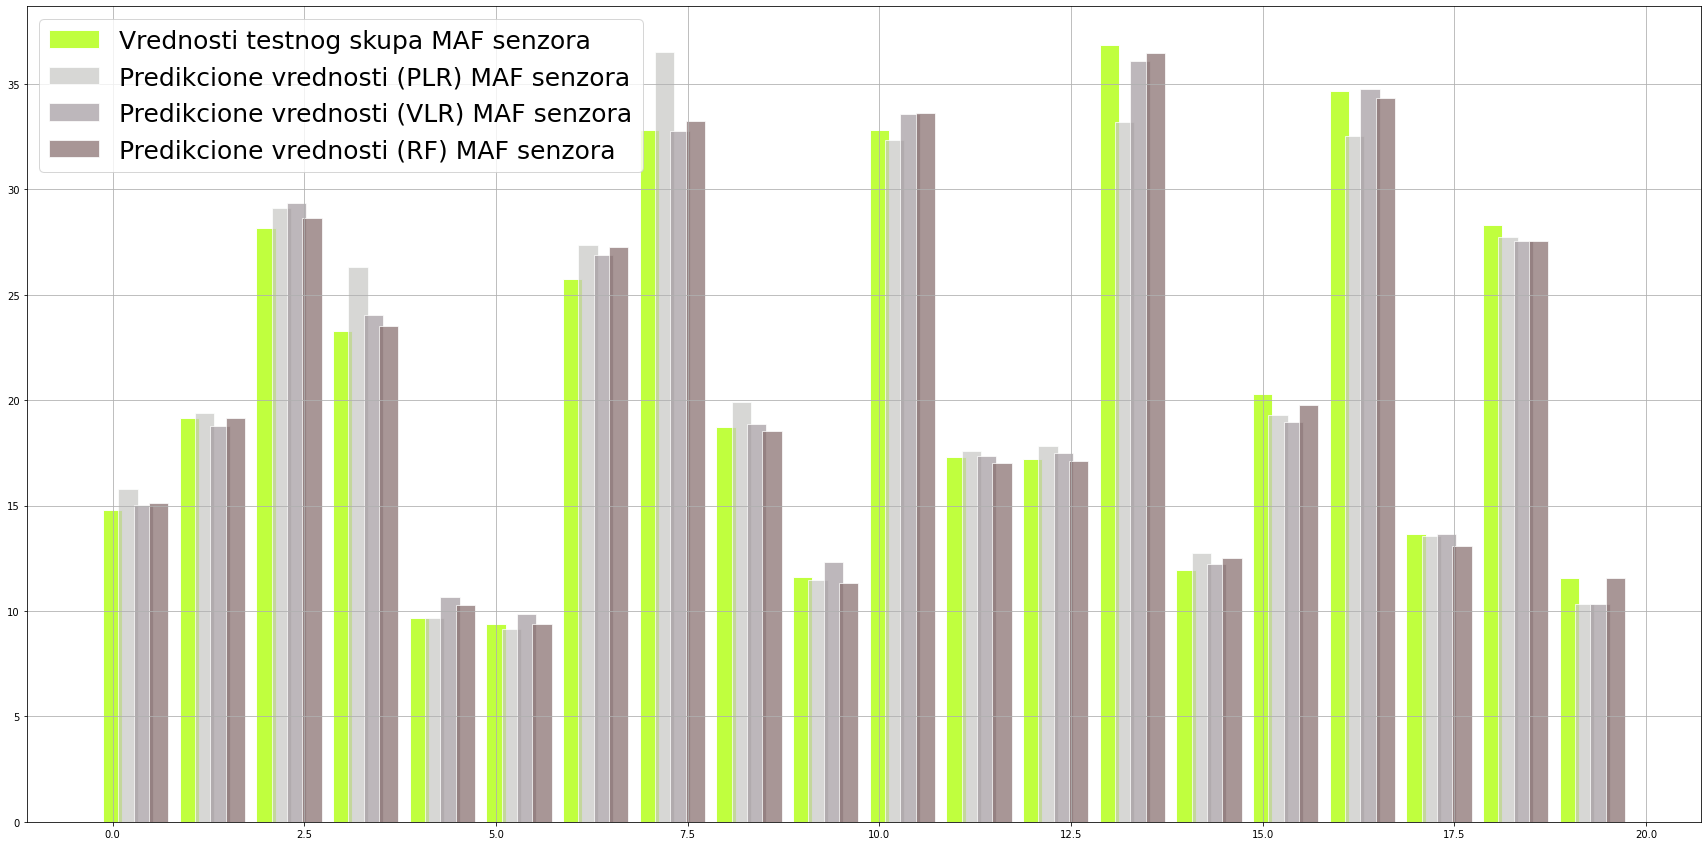

In [73]:
plt.figure(figsize=(30,15))
# set width of bars
barWidth = 0.2

y_test_mlr_small_bar = y_test_mlr[:20]
y_pred_lr_small_bar = y_pred_lr[:20]
y_pred_mlr_small_bar = y_pred_mlr[:20]
y_pred_rf_small_bar = y_pred_rf[:20]

# Set position of bar on X axis
r1 = np.arange(len(y_test_mlr_small_bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# Make the plot
plt.bar(r1, y_test_mlr_small_bar, color='#BAFF29', width=0.25, edgecolor='white', label='Vrednosti testnog skupa MAF senzora', alpha=0.9)
plt.bar(r2, y_pred_lr_small_bar, color='#C6C7C4', width=0.25, edgecolor='white', label='Predikcione vrednosti (PLR) MAF senzora', alpha=0.7)
plt.bar(r3, y_pred_mlr_small_bar, color='#A2999E', width=0.25, edgecolor='white', label='Predikcione vrednosti (VLR) MAF senzora', alpha=0.7)
plt.bar(r4, y_pred_rf_small_bar, color='#846A6A', width=0.25, edgecolor='white', label='Predikcione vrednosti (RF) MAF senzora', alpha=0.7)
plt.grid()
plt.legend(loc="upper left", fontsize=25)